In [78]:
import scienceplots
import numpy as np
from numpy.linalg import *
import matplotlib.pyplot as plt
plt.style.use(['science','notebook','grid'])

## Hermitian SSH Model

The SSH Model comprises of lattice sites, having alternate hopping amplitudes: $t_2$ and $t_1$. We first consider the Hermitian case of the Hamiltonian. 
The Hamiltonian can be written as:
$$\hat{H}_{\text{SSH}}= \sum_{x=0}^N t_1\left ( \hat{c}_{x,A}^{\dagger}\hat{c}_{x,B} + \hat{c}_{x,B}^{\dagger}\hat{c}_{x,A}\right )+t_2\left ( \hat{c}_{x,B}^{\dagger}\hat{c}_{x+1,A} + \hat{c}_{x+1,A}^{\dagger}\hat{c}_{x,B}\right )$$
where,\
$t_1$ : intracellular hopping amplitude\
$t_2$ : intercellular hopping amplitude


\
The Hamiltonian Matrix assumes a tridiagonal form with respect to the basis of the creating and annihilation operators for the lattice site.
$$\displaystyle H_{SSH} =\ \begin{bmatrix}
0 & t_1 &  &  &  &  &  & \\
t_1 & 0 & t_2 &  &  &  \text{\huge0}&  & \\
 & t_2 & 0 & t_1 &  &  &  & \\
 &  & t_1 & 0 & t_2 &  &  & \\
 &  &  & t_2 & 0 & t_1 &  & \\
 &  &  &  & t_1 & 0 & t_2 & \\
 &  \text{\huge0} &  &  &  & t_2 & \ddots  & \\
 &  &  &  &  &  &  & 0
\end{bmatrix}$$

## Non-Hermitian Model
In case of non-Hermitian Model, we introduce:

$\bullet$ Asymmetric Intracellular hopping, with asymmetry parameter $\gamma$

$\bullet$ A hopping term from $A_i$ to $B_{i+1}$ and vice versa, with hopping paramter $t_3$


$\text{\underline{The Non-Hermitian SSH-Hamiltonian}}$:

$$\hat H_\text{SSH} = \sum_i (t_1-\gamma/2)\, c^\dagger_{A\,i} c_{B\,i} + \sum_{i}(t_1+\gamma/2)\, c^\dagger_{B\,i} c_{A\,i}
+ \sum_{i} t_2 \big[ c^\dagger_{A\,i+1} c_{B\,i} +  c^\dagger_{B\,i} c_{A\,i+1} \big]
+ \sum_{i}t_3 \big[c^\dagger_{A\,i} c_{B\,i+1}+c^\dagger_{B\,i+1} c_{A\,i}\big]$$


In this case, the Matrix of the Hamiltonian takes up a more complicated form, but again with some symmetry. 
$$\displaystyle H_{SSH} =\ \begin{bmatrix}
0 & t_1-g/2 & 0 & t_3 &  &  &  & \\
t_1+g/2 & 0 & t_2 &  &  &  \text{\Huge0}&  & \\
 & t_2 & 0 & t_1-g/2 & 0 & t_3 &  & \\
 t_3 & 0 & t_1+g/2 & 0 & t_2 &  &  & \\
 &  &  & t_2 & 0 & t_1-g/2 & 0 & t_3 \\
 &  & t_3 & 0 & t_1+g/2 & 0 & t_2 & \\
 &  \text{\Huge0} &  &  &  & t_2 & \ddots  & \\
 &  &  &  &  &  &  & 0
\end{bmatrix}$$


In [79]:
#Definining the Hamiltonian Matrix for general SSH Model 
def H_SSH_NH(L,t1,t2,t3, g):
        H = np.zeros((L,L)) # Initialization
        H[0,1]=t1-g/2
        H[1,0]=t1+g/2
        H[0,3]=t3
        H[1,2]=t2
        H[0,3]=t3
        H[L-2, L-3]=t2
        H[L-1,L-4]=t3
        H[L-2,L-1]=t1-g/2
        H[L-1,L-2]=t1+g/2
        for i in range(2,L-2):
              if(i%2==0):
                H[i,i-1]=t2
                H[i,i+1]=t1-g/2
                H[i,i+3]=t3
              else:
                H[i,i-3]=t3
                H[i,i-1]=t1+g/2
                H[i,i+1]=t2
                    
                
        return H 

In [80]:
#Function to indicate the index for the zero mode. Zero Mode is the state for which the energy eigenvalue is zero.
#Since in the simulation, the value might not exactly be zero, we set a tolerance limit for the energy, 0.01
def edge(q):
    a=[]
    for i in range(len(q)):
        if(abs(q[i])<0.01):
            a.append(i)
    return a



In [81]:
n=40
#Finding the edge states when t1>t2, non-hermitian parameters are all zero
p,q= eig(H_SSH_NH(n,1,0.5, 0, 0))
L=np.arange(n)
A=edge(p)
print(A)

[]


We see that when t1>t2, we get no zero energy state.

In [82]:
#Finding the edge states when t1<t2, non-hermitian parameters are all zero
p,q= eig(H_SSH_NH(n,0.5,1, 0, 0))
L=np.arange(n)
A=edge(p)
print(A)


[19, 20]


We see that in this case, we obtain two zero energy states

Text(0.5, 0.98, 'Zero Energy Edge States ($t_1=0.5, t_2=1, t_3=0, \\gamma$=0)')

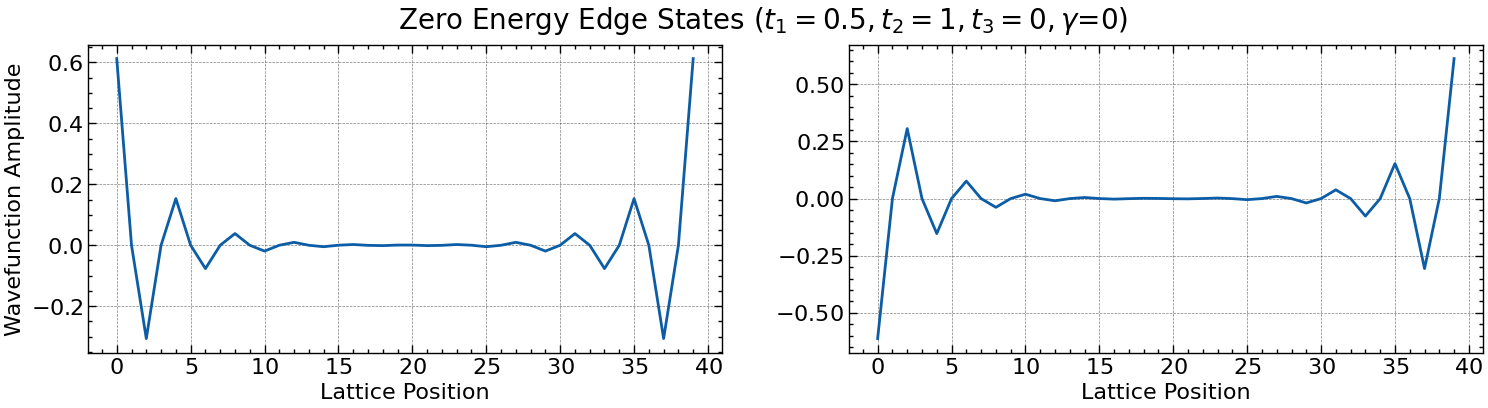

In [93]:
#Plotting the wavefunction for these states
fig, axs = plt.subplots(1,2,figsize=(18, 4))
axs[0].plot(L, q[:,A[0]])
axs[0].set_ylabel("Wavefunction Amplitude")
axs[0].set_xlabel("Lattice Position")
axs[1].plot(L, q[:,A[1]])
axs[1].set_xlabel("Lattice Position")
plt.suptitle("Zero Energy Edge States ({g})".format(g=r'$t_1=0.5, t_2=1, t_3=0, \gamma$=0'), size=20)

By plotting the wavefunction, we can see that the amplitude is localised along the edges and hence these are called the edge states. These are symmetric on both the edges. Now we randomly plot a bulk state, with non-zero energy

Text(0, 0.5, 'Amplitude')

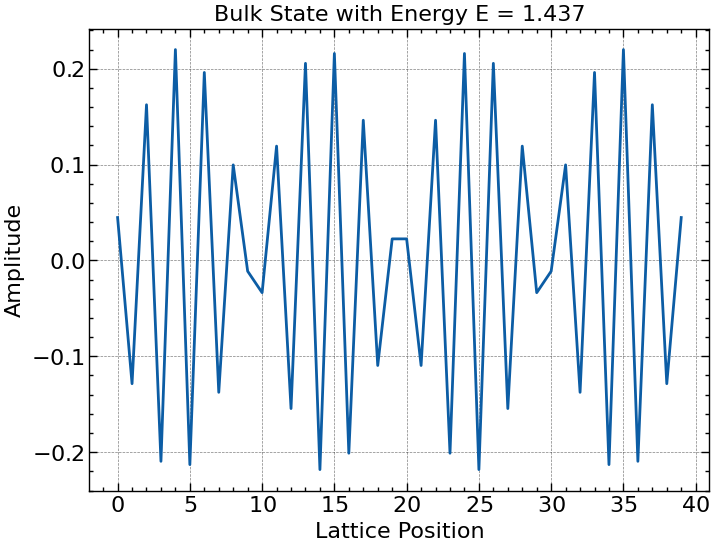

In [84]:
plt.plot(L,q[:,3])
E=abs(p[3])
plt.title("Bulk State with Energy E = {En}".format(En=round(E,3)))
plt.xlabel("Lattice Position")
plt.ylabel("Amplitude")


We now plot the enegy eigenspectrum by varying the hopping parameter $t_1$, keeping $t_2=1$

Text(0.5, 1.0, 'Energy Eigenspectrum ($t_2=1, t_3= 0, \\gamma$=0)')

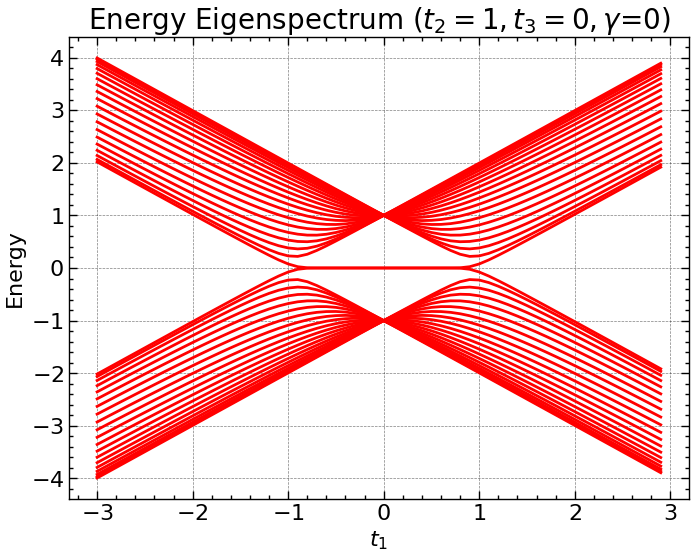

In [85]:
t1=np.arange(-3,3,0.1)
EV=[]
for i in t1:
    pn,qn=eig(H_SSH_NH(n,i,1,0,0))
    pn.sort()
    EV.append(pn)
Re_E=[]

for i in range(len(EV)):
    Re_E.append(EV[i].real)
for j in range(n):
    k=[]
    for i in range(len(Re_E)):
        k.append(Re_E[i][j])
    plt.plot(t1,k, 'red')
plt.xlabel("{t}".format(t=r'$t_1$'))
plt.ylabel("Energy")
plt.title("Energy Eigenspectrum ({g})".format(g=r'$t_2=1, t_3= 0, \gamma$=0'), size=20)


We now move onto the non-Hermitian Model. We first incorporate the assymetric hopping term

[38, 39]


c:\Users\DELL\anaconda3\envs\qiskit-stable\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0.98, 'Zero Energy Edge States ($t_1=0.2, t_2=1, t_3=0, \\gamma$=1.33)')

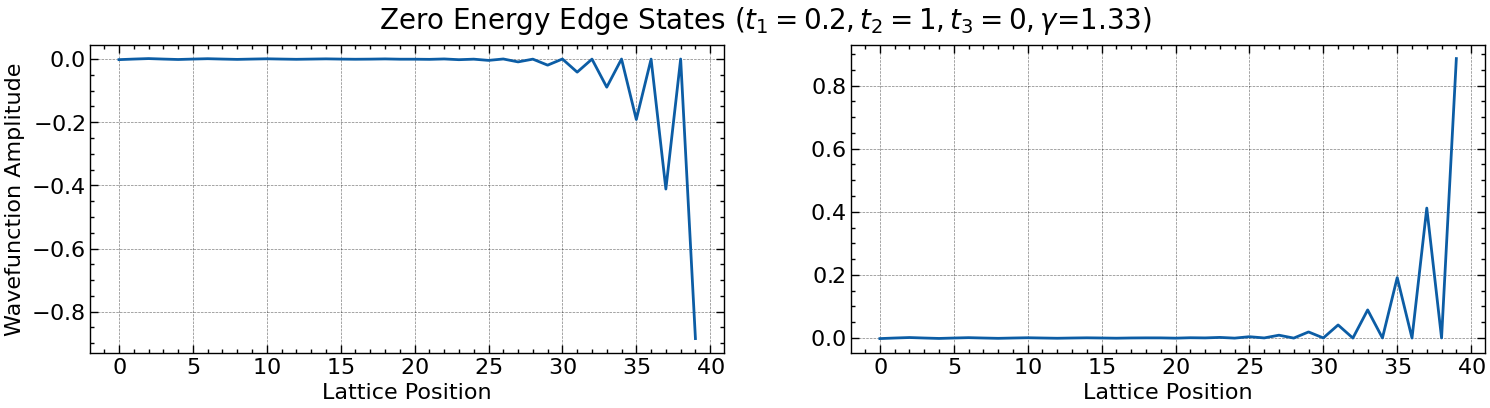

In [86]:
#We set the gamma parameter to be 1.33
p1,q1=eig(H_SSH_NH(n, 0.2, 1, 0, 1.33))
A1=edge(p1)
print(A1)
#Plotting the wavefunction for these states
fig, axs = plt.subplots(1,2,figsize=(18, 4))
axs[0].plot(L, q1[:,A1[0]])
axs[0].set_ylabel("Wavefunction Amplitude")
axs[0].set_xlabel("Lattice Position")
axs[1].plot(L, q1[:,A1[1]])
axs[1].set_xlabel("Lattice Position")
plt.suptitle("Zero Energy Edge States ({g})".format(g=r'$t_1=0.2, t_2=1, t_3=0, \gamma$=1.33'), size=20)


We see that the edge states no longer remain symmetric and are localised to the right edge of the system

Text(0.5, 0.98, 'Zero Energy Edge States ($t_1=0.3, t_2=1, t_3= 0, \\gamma$=-1.33)')

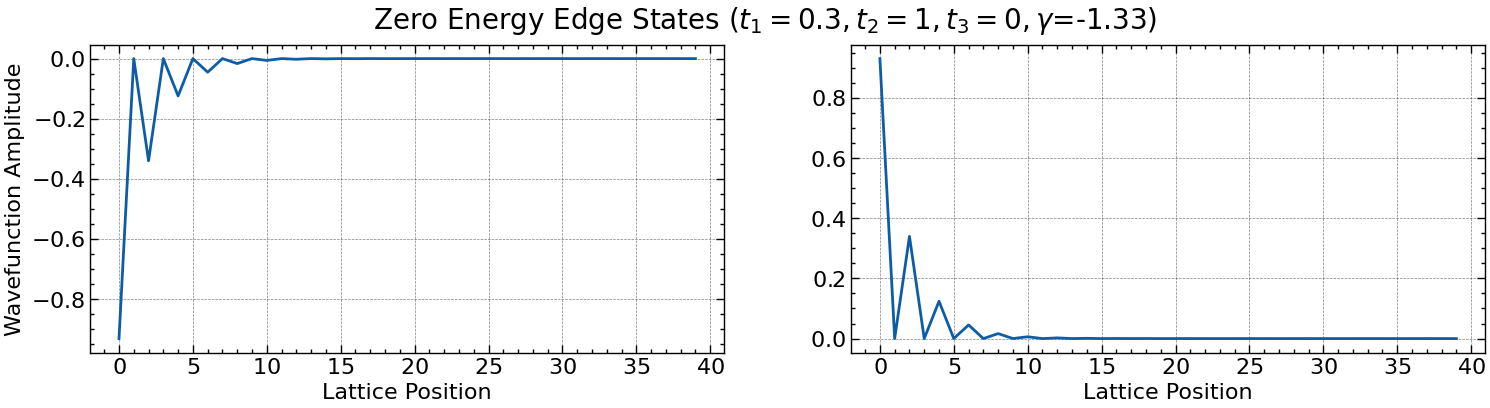

In [87]:
#Now we set the gamma parameter to be -1.33
p2,q2=eig(H_SSH_NH(n, 0.3, 1, 0, -1.33))
A2=edge(p2)
#Plotting the wavefunction for these states
fig, axs = plt.subplots(1,2,figsize=(18, 4))
axs[0].plot(L, q2[:,A2[0]])
axs[0].set_ylabel("Wavefunction Amplitude")
axs[0].set_xlabel("Lattice Position")
axs[1].plot(L, q2[:,A2[1]])
axs[1].set_xlabel("Lattice Position")
plt.suptitle("Zero Energy Edge States ({g})".format(g=r'$t_1=0.3, t_2=1, t_3= 0, \gamma$=-1.33'), size=20)

We see that the edge states become localised to the left edge of the system on changing the sign of the gamma parameter. Now we plot a random Bulk State (with non-zero energy).

Text(0, 0.5, 'Amplitude')

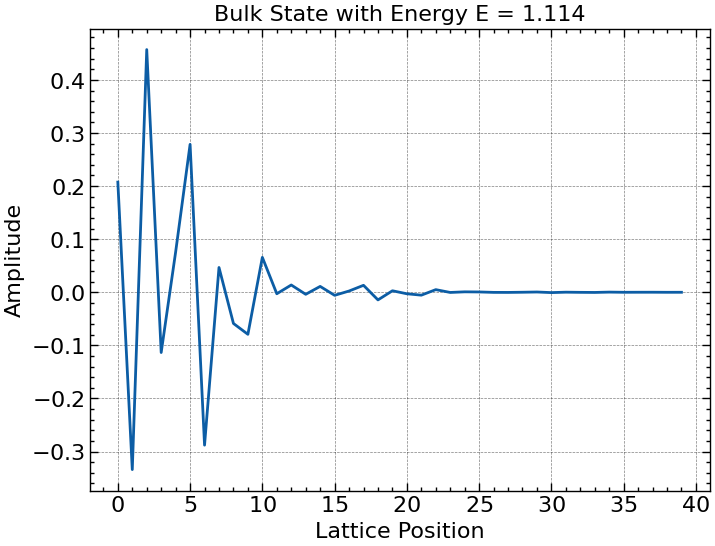

In [88]:
plt.plot(L,q2[:,4])
Ene=abs(p2[4])
plt.title("Bulk State with Energy E = {En}".format(En=round(Ene,3)))
plt.xlabel("Lattice Position")
plt.ylabel("Amplitude")

We see that the Bulk State is also localised along the edge of the system. Hence, on introducing the $\gamma$ parameter, the bulk also gets 'edged'. Now, we plot the energy eigenspectrums for this situation

Text(0.5, 1.0, 'Real Part of Energy ($t_2=1, t_3= 0, \\gamma$=1.33)')

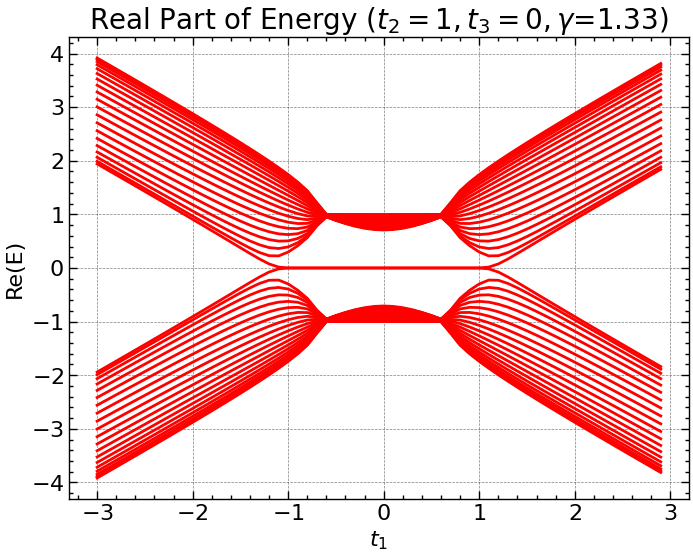

In [89]:
t1=np.arange(-3,3,0.1)
EV=[]
for i in t1:
    pn,qn=eig(H_SSH_NH(n,i,1,0,1.33))
    pn.sort()
    EV.append(pn)
Re_E=[]
Im_E=[]
Abs_E=[]
for i in range(len(EV)):
    Re_E.append(EV[i].real)
    Im_E.append(EV[i].imag)
    Abs_E.append(abs(EV[i]))
for j in range(n):
    k=[]
    for i in range(len(Re_E)):
        k.append(Re_E[i][j])
    plt.plot(t1,k, 'red')
plt.xlabel("{t}".format(t=r'$t_1$'))
plt.ylabel("Re(E)")
plt.title("Real Part of Energy ({g})".format(g=r'$t_2=1, t_3= 0, \gamma$=1.33'), size=20)


Text(0.5, 1.0, 'Imaginary Part of Energy ($t_2=1, t_3= 0, \\gamma$=1.33)')

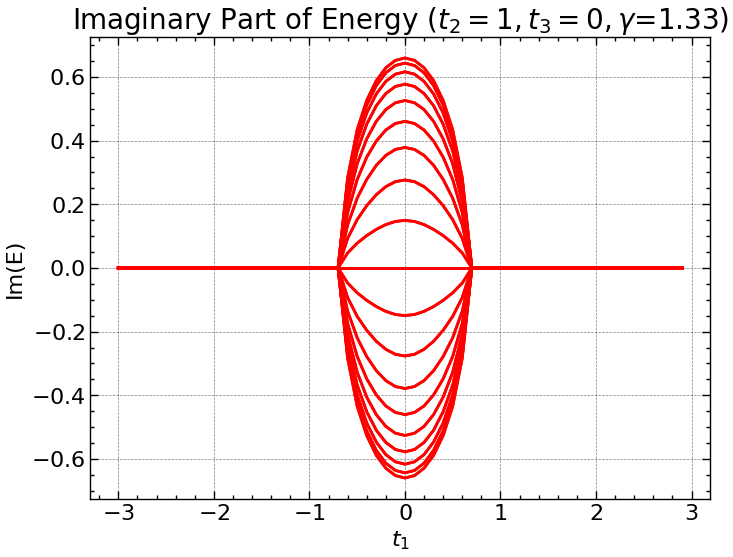

In [90]:
for j in range(n):
    k=[]
    for i in range(len(Im_E)):
        k.append(Im_E[i][j])
    plt.plot(t1,k, 'red')
plt.xlabel("{t}".format(t=r'$t_1$'))
plt.ylabel("Im(E)")
plt.title("Imaginary Part of Energy ({g})".format(g=r'$t_2=1, t_3= 0, \gamma$=1.33'), size=20)

Text(0.5, 1.0, 'Absolute Value of Energy ($t_2=1, t_3= 0, \\gamma$=1.33)')

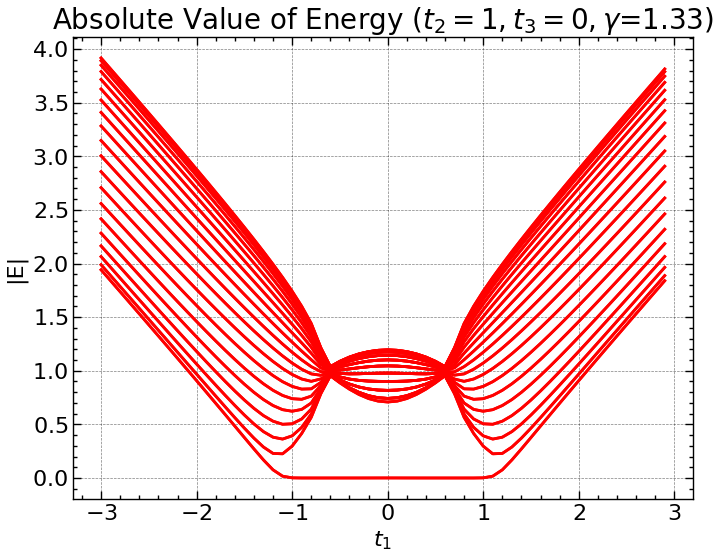

In [91]:
for j in range(n):
    k=[]
    for i in range(len(Abs_E)):
        k.append(Abs_E[i][j])
    plt.plot(t1,k, 'red')
plt.xlabel("{t}".format(t=r'$t_1$'))
plt.ylabel("|E|")
plt.title("Absolute Value of Energy ({g})".format(g=r'$t_2=1, t_3= 0, \gamma$=1.33'), size=20)

We now finally set the parameter $t_3$ to a finite value.

c:\Users\DELL\anaconda3\envs\qiskit-stable\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0.5, 0.98, 'Zero Energy Edge States ($t_1=0.9, t_2=1, t_3=0.2, \\gamma$=1.33)')

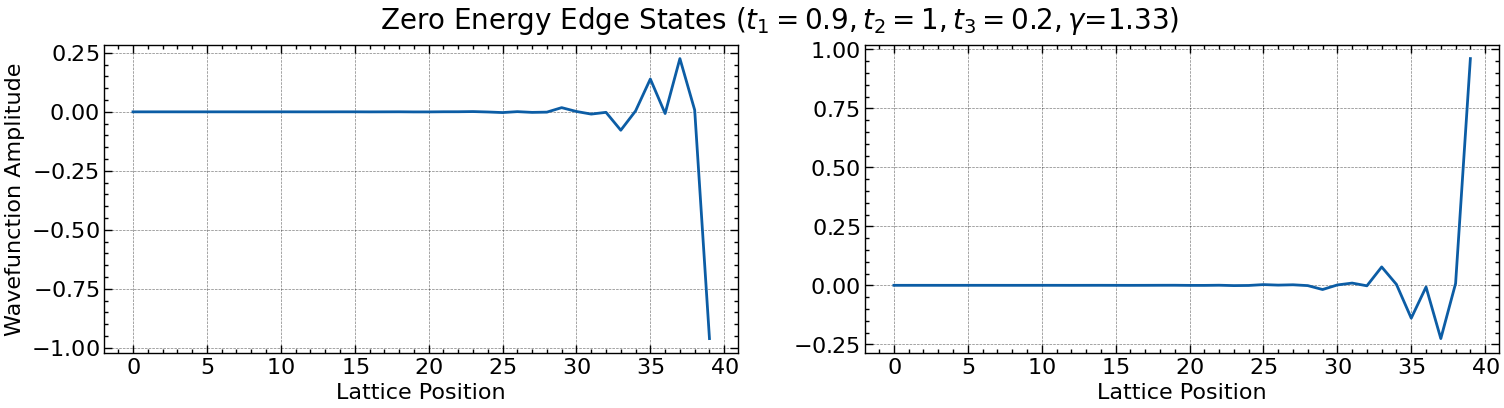

In [97]:
#We set the t3 parameter to be 0.2 and gamma to be 1.33
p3,q3=eig(H_SSH_NH(n, 0.9, 1, 0.2, 1.33))
A3=edge(p3)
#Plotting the wavefunction for these states
fig, axs = plt.subplots(1,2,figsize=(18, 4))
axs[0].plot(L, q3[:,A1[0]])
axs[0].set_ylabel("Wavefunction Amplitude")
axs[0].set_xlabel("Lattice Position")
axs[1].plot(L, q3[:,A1[1]])
axs[1].set_xlabel("Lattice Position")
plt.suptitle("Zero Energy Edge States ({g})".format(g=r'$t_1=0.9, t_2=1, t_3=0.2, \gamma$=1.33'), size=20)


Here we are getting the edge localisation when $t_1$ and $t_2$ are very close in value. 

Text(0.5, 1.0, 'Real Part of Energy ($t_2=1, t_3= 0.2, \\gamma$=1.33)')

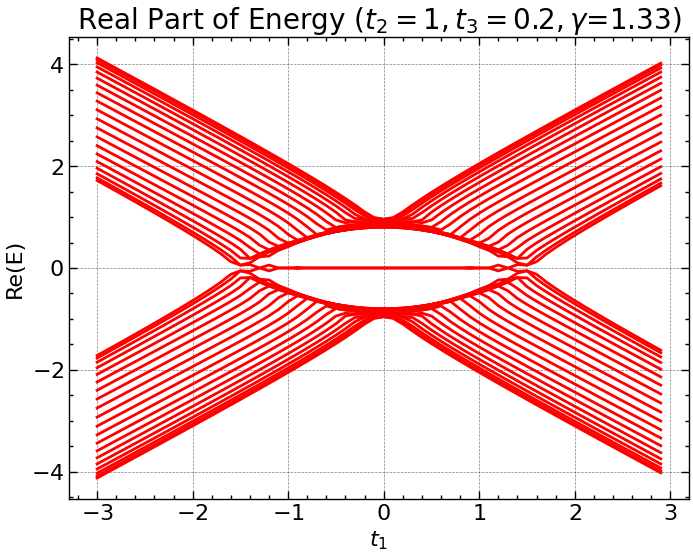

In [102]:
t1=np.arange(-3,3,0.1)
EV2=[]
for i in t1:
    pn,qn=eig(H_SSH_NH(n,i,1,0.2, 1.33))
    pn.sort()
    EV2.append(pn)
Re_E1=[]
Im_E1=[]
Abs_E1=[]
for i in range(len(EV2)):
    Re_E1.append(EV2[i].real)
    Im_E1.append(EV2[i].imag)
    Abs_E1.append(abs(EV2[i]))
for j in range(n):
    k=[]
    for i in range(len(Re_E1)):
        k.append(Re_E1[i][j])
    plt.plot(t1,k, 'red')
plt.xlabel("{t}".format(t=r'$t_1$'))
plt.ylabel("Re(E)")
plt.title("Real Part of Energy ({g})".format(g=r'$t_2=1, t_3= 0.2, \gamma$=1.33'), size=20)

Text(0.5, 1.0, 'Imaginary Part of Energy ($t_2=1, t_3= 0.2, \\gamma$=1.33)')

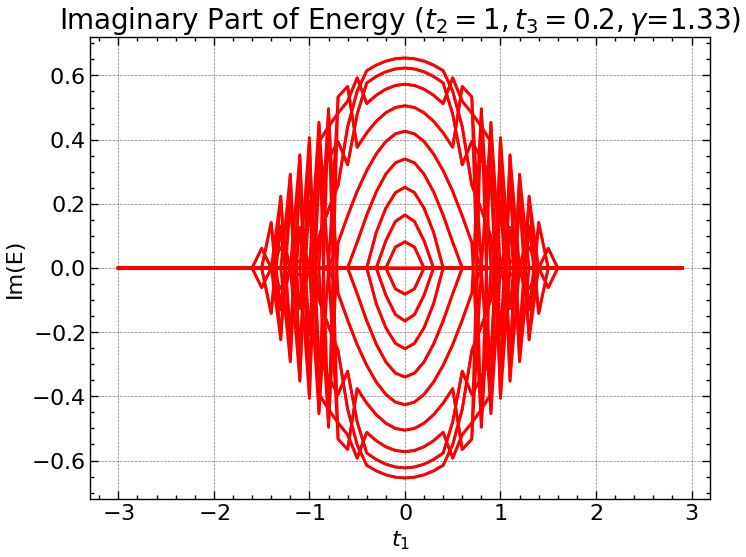

In [103]:
for j in range(n):
    k=[]
    for i in range(len(Im_E1)):
        k.append(Im_E1[i][j])
    plt.plot(t1,k, 'red')
plt.xlabel("{t}".format(t=r'$t_1$'))
plt.ylabel("Im(E)")
plt.title("Imaginary Part of Energy ({g})".format(g=r'$t_2=1, t_3= 0.2, \gamma$=1.33'), size=20)

Text(0.5, 1.0, 'Absolute Value of Energy ($t_2=1, t_3= 0.2, \\gamma$=1.33)')

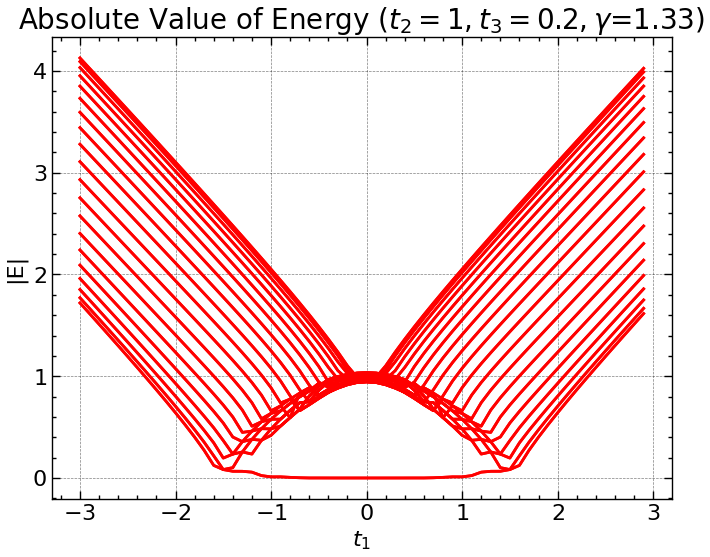

In [104]:
for j in range(n):
    k=[]
    for i in range(len(Abs_E1)):
        k.append(Abs_E1[i][j])
    plt.plot(t1,k, 'red')
plt.xlabel("{t}".format(t=r'$t_1$'))
plt.ylabel("|E|")
plt.title("Absolute Value of Energy ({g})".format(g=r'$t_2=1, t_3= 0.2, \gamma$=1.33'), size=20)